<a href="https://colab.research.google.com/github/zhong338/MFM-FM5222/blob/main/week2_similar_dists.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# When common distributions are similar.


In the previous video, we fit several distributions to data that was generated from a gamma distribution.  Unsurprisingly, the gamma fit "looked" much better than the alternatives.

However, depending the parameters, many common distributions can be very similar.  We give a few examples here:

## Normal and Student's T

You may already know this, but as $\nu$ gets larger, the more the Student's T resembles the regular normal distribution.

To make the comparison visually, we will plot several T disgtributions with varying $\nu$ values, but in all cases, we will standardize them by taking the shape parameter to be $\sqrt{\frac{\nu-2}{\nu}}$ so that the variance is $1$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss



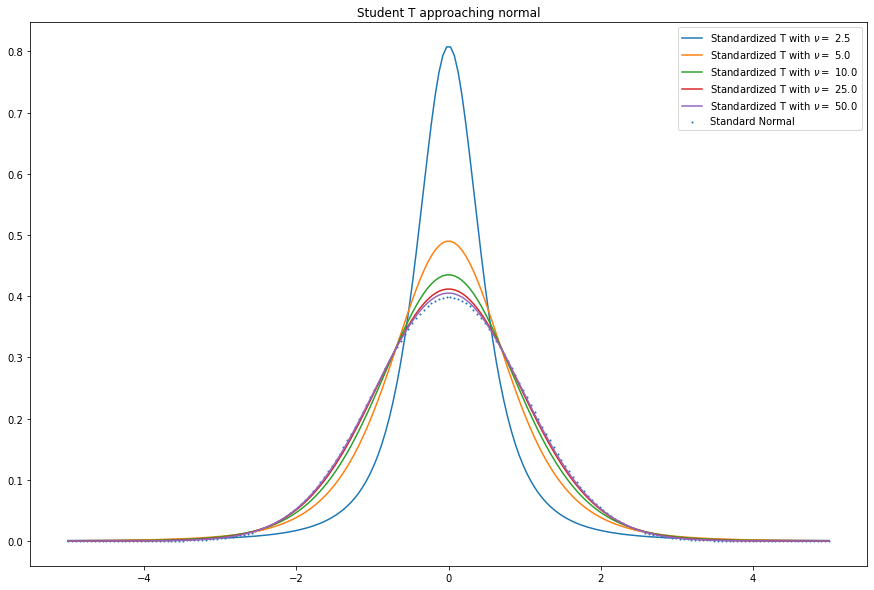

In [ ]:
nus = np.array([2.5, 5, 10,25,50])

x = np.linspace(-5,5,200)

plt.figure(figsize = (15,10))
plt.scatter(x, ss.norm.pdf(x), label="Standard Normal", s= 1)

for df in nus:
    
    plt.plot(x, ss.t.pdf(x, df = df, scale = np.sqrt((df-2)/df)), label= "Standardized T with $\\nu =$ "+str(df))
    

plt.legend()


plt.title("Student T approaching normal")

plt.show()
    
    

This kind of makes sense because the excess kurtosis is $\frac{6}{\nu -4}$ so as $\nu \to \infty$, the excess kurtosis approaches zero.  

## Gamma and Normal

When $\alpha$ becomes large, the gamme distribution begins to resemble the normal distribution.

Because the Gamma distribution is stictly positive, we will show this by specifying $\beta = \sqrt{\frac{1}{\alpha_i}}$ for an increasing set of $\alpha_i$.  This makes the variance equal to one.   We then shift by $-\sqrt{\alpha_i}$ so that the means are all zero.


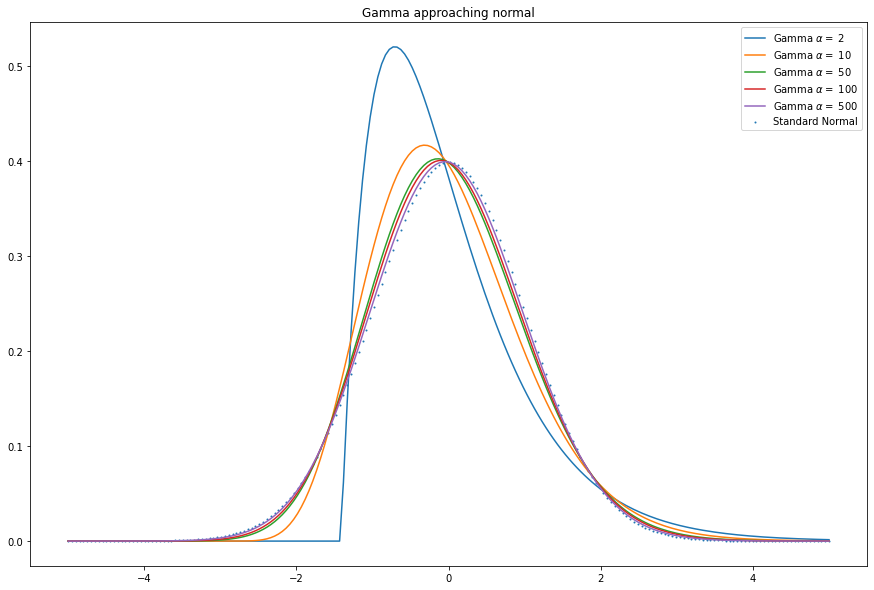

In [ ]:
alphas = np.array([2,10,50,100,500])


plt.figure(figsize = (15,10))

plt.scatter(x, ss.norm.pdf(x), label="Standard Normal", s= 1)

for a in alphas:
    
    plt.plot(x, ss.gamma.pdf(x, a = a, scale = np.sqrt(1/a),loc = -np.sqrt(a)), label= "Gamma $\\alpha =$ "+str(a))
    

plt.legend()


plt.title("Gamma approaching normal")
plt.show()


## Lognormal and Normal

As the $\sigma$ parmeter becomes smaller, the lognormal distribution will resemble the normal distribution.   To make the comparison, take a sequence of $\sigma_i$ and set

$\mu_i = \frac{-1}{2}\left(\sigma_i^2+\ln(e^{\sigma_i^2}-1)\right)$ so that the variance is 1.

And then set the location parameter to $e^{\mu_i + \frac{1}{2}\sigma_i^2}$ so that the mean is zero.

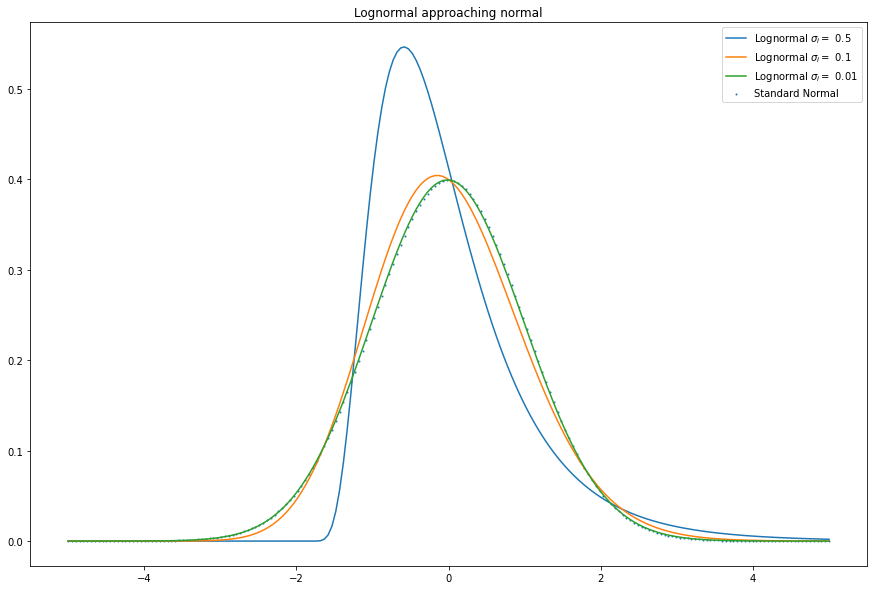

In [ ]:
sigmas = np.array([.5, .1, .01])


plt.figure(figsize = (15,10))

plt.scatter(x, ss.norm.pdf(x), label="Standard Normal", s= 1)

for s in sigmas:
    
    mu = -0.5*(s**2 + np.log(np.exp(s**2) -1))
    scale = np.exp(mu)
    
    loc = - np.exp(mu + 0.5*s**2)
    
    
    plt.plot(x, ss.lognorm.pdf(x, s = s, scale = scale,loc = loc), label= "Lognormal $\\sigma_i =$ "+str(s))
    

plt.legend()

plt.title("Lognormal approaching normal")

plt.show()

## Gamma and Exponential

For large $\alpha$, we saw above that the gamma distribution looks "normal".  However, for $\alpha = 1$, the gamma distribution is actually the exponential distribution.  Meaning in particular that for $\alpha \approx 1$, the distribution "looks" exponential.

For each choice of $\alpha_i$, we will set $\beta_i = \sqrt{\frac{1}{\alpha_i}}$ so that the varaince is 1.  And then shift by $1-\alpha_i\beta_i$ so that the mean is exactly 1.  

We compare thess with the exponential with $\lambda  = 1$.





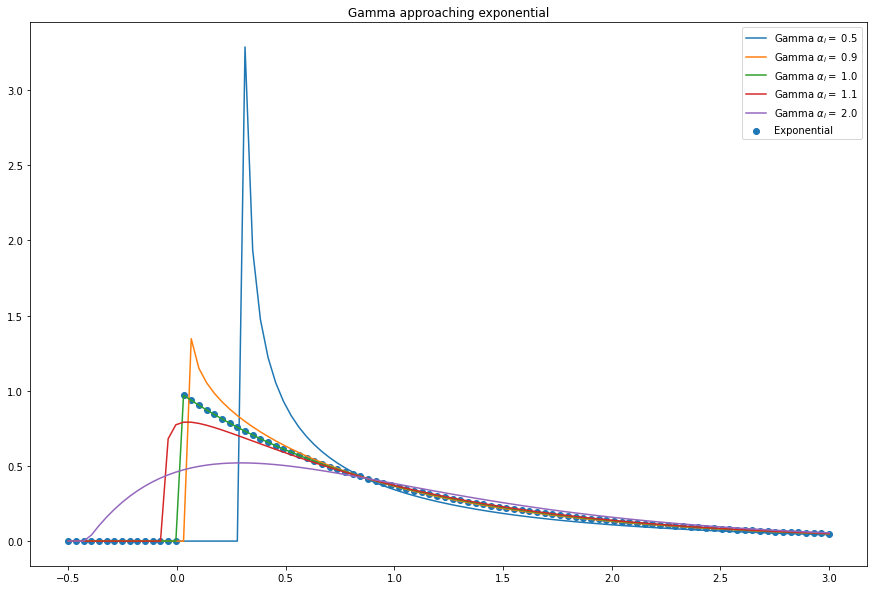

In [ ]:
x = np.linspace(-.5,3,100)

alphas = np.array([.5,.9, 1,1.1, 2])


plt.figure(figsize = (15,10))

plt.scatter(x, ss.expon.pdf(x), label="Exponential")

for a in alphas:
    
    b = np.sqrt(1/a)
    
    
    
    plt.plot(x, ss.gamma.pdf(x, a =a ,scale = b, loc = 1 - a*b), label= "Gamma $\\alpha_i =$ "+str(a))
    

plt.legend()

plt.title("Gamma approaching exponential")

plt.show()